In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main'))
from src import preprocessing

In [2]:
X_train = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_train.csv")
X_test = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_test.csv")
y_train = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/y_train.csv")
y_test = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/y_test.csv")

In [3]:
numeric_cols = source.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (20, 30))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x = source[col], color = 'skyblue')
    plt.title(f'Boxplot of {col}', fontsize = 12)
    plt.tight_layout()

plt.show()


NameError: name 'source' is not defined

In [ ]:
scaler_mapping = {
    'Age': 'RobustScaler',
    'NCP': 'RobustScaler',
    'Height': 'StandardScaler',
    'Weight': 'StandardScaler',
    'CALC': 'RobustScaler',
    'FCVC': 'StandardScaler',
    'CH2O': 'StandardScaler',
    'FAF': 'StandardScaler',
    'TUE': 'StandardScaler',
    'CAEC': 'RobustScaler',
}

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for feature, scaler_type in scaler_mapping.items():
    if scaler_type == 'MinMaxScaler':
        X_train_scaled, X_test_scaled = preprocessing.scale_minmax(X_train_scaled, X_test_scaled, [feature])
    elif scaler_type == 'StandardScaler':
        X_train_scaled, X_test_scaled = preprocessing.scale_standard(X_train_scaled, X_test_scaled, [feature])
    elif scaler_type == 'RobustScaler':
        X_train_scaled, X_test_scaled = preprocessing.scale_robust(X_train_scaled, X_test_scaled, [feature])

X_scaled_combined = pd.concat([X_train_scaled, X_test_scaled], axis = 0).reset_index(drop = True)
y_combined = pd.concat([y_train, y_test], axis = 0).reset_index(drop = True)

preprocessed_dataset_scaled = X_scaled_combined.copy()
preprocessed_dataset_scaled['target'] = y_combined 
preprocessed_dataset_scaled

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,Automobile,Bike,Motorbike,Public_Transportation,Walking,target
0,0.187931,0.0,-0.923914,0.539578,-1.0,1,0.872726,-3.466577,0,0,...,1.0,0.087554,0.681499,0.00,0,0,0,1,0,5
1,-0.222125,1.0,1.112428,2.871914,0.0,1,1.098762,0.000000,0,0,...,1.0,-0.677285,-0.006556,0.00,0,0,0,1,0,6
2,2.775739,0.0,0.965450,0.453708,0.0,1,-0.710481,-2.113806,0,0,...,1.0,0.303139,0.042355,0.00,1,0,0,0,0,4
3,1.012959,0.0,2.244734,1.683830,0.0,1,-0.402662,0.000000,0,0,...,1.0,0.130509,-1.059578,0.00,0,0,0,1,0,5
4,-0.308298,0.0,-0.860279,-0.628454,0.0,1,-0.792484,-5.346764,0,0,...,0.0,-0.002895,-1.059578,-0.25,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.518231,1.0,-0.736263,0.977641,0.0,1,1.098762,0.000000,0,0,...,1.0,-1.181703,-0.643837,0.00,0,0,0,1,0,6
2107,0.518231,1.0,-0.738572,0.986961,0.0,1,1.098762,0.000000,0,0,...,1.0,-1.181703,-0.669061,0.00,0,0,0,1,0,6
2108,0.000446,1.0,-0.479940,-1.384426,-1.0,1,1.098762,1.718455,0,0,...,1.0,-1.042284,-0.951765,0.50,0,0,0,1,0,0
2109,-0.804216,0.0,0.887369,0.840765,-1.0,1,-0.792484,-0.921608,0,0,...,1.0,-0.002895,-0.150102,0.00,0,0,0,1,0,4


In [ ]:
X_train_scaled.to_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_train_scaled.csv", index = False)
X_test_scaled.to_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_test_scaled.csv", index = False)
preprocessed_dataset_scaled.to_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/scaled_processed_dataset.csv", index = False)

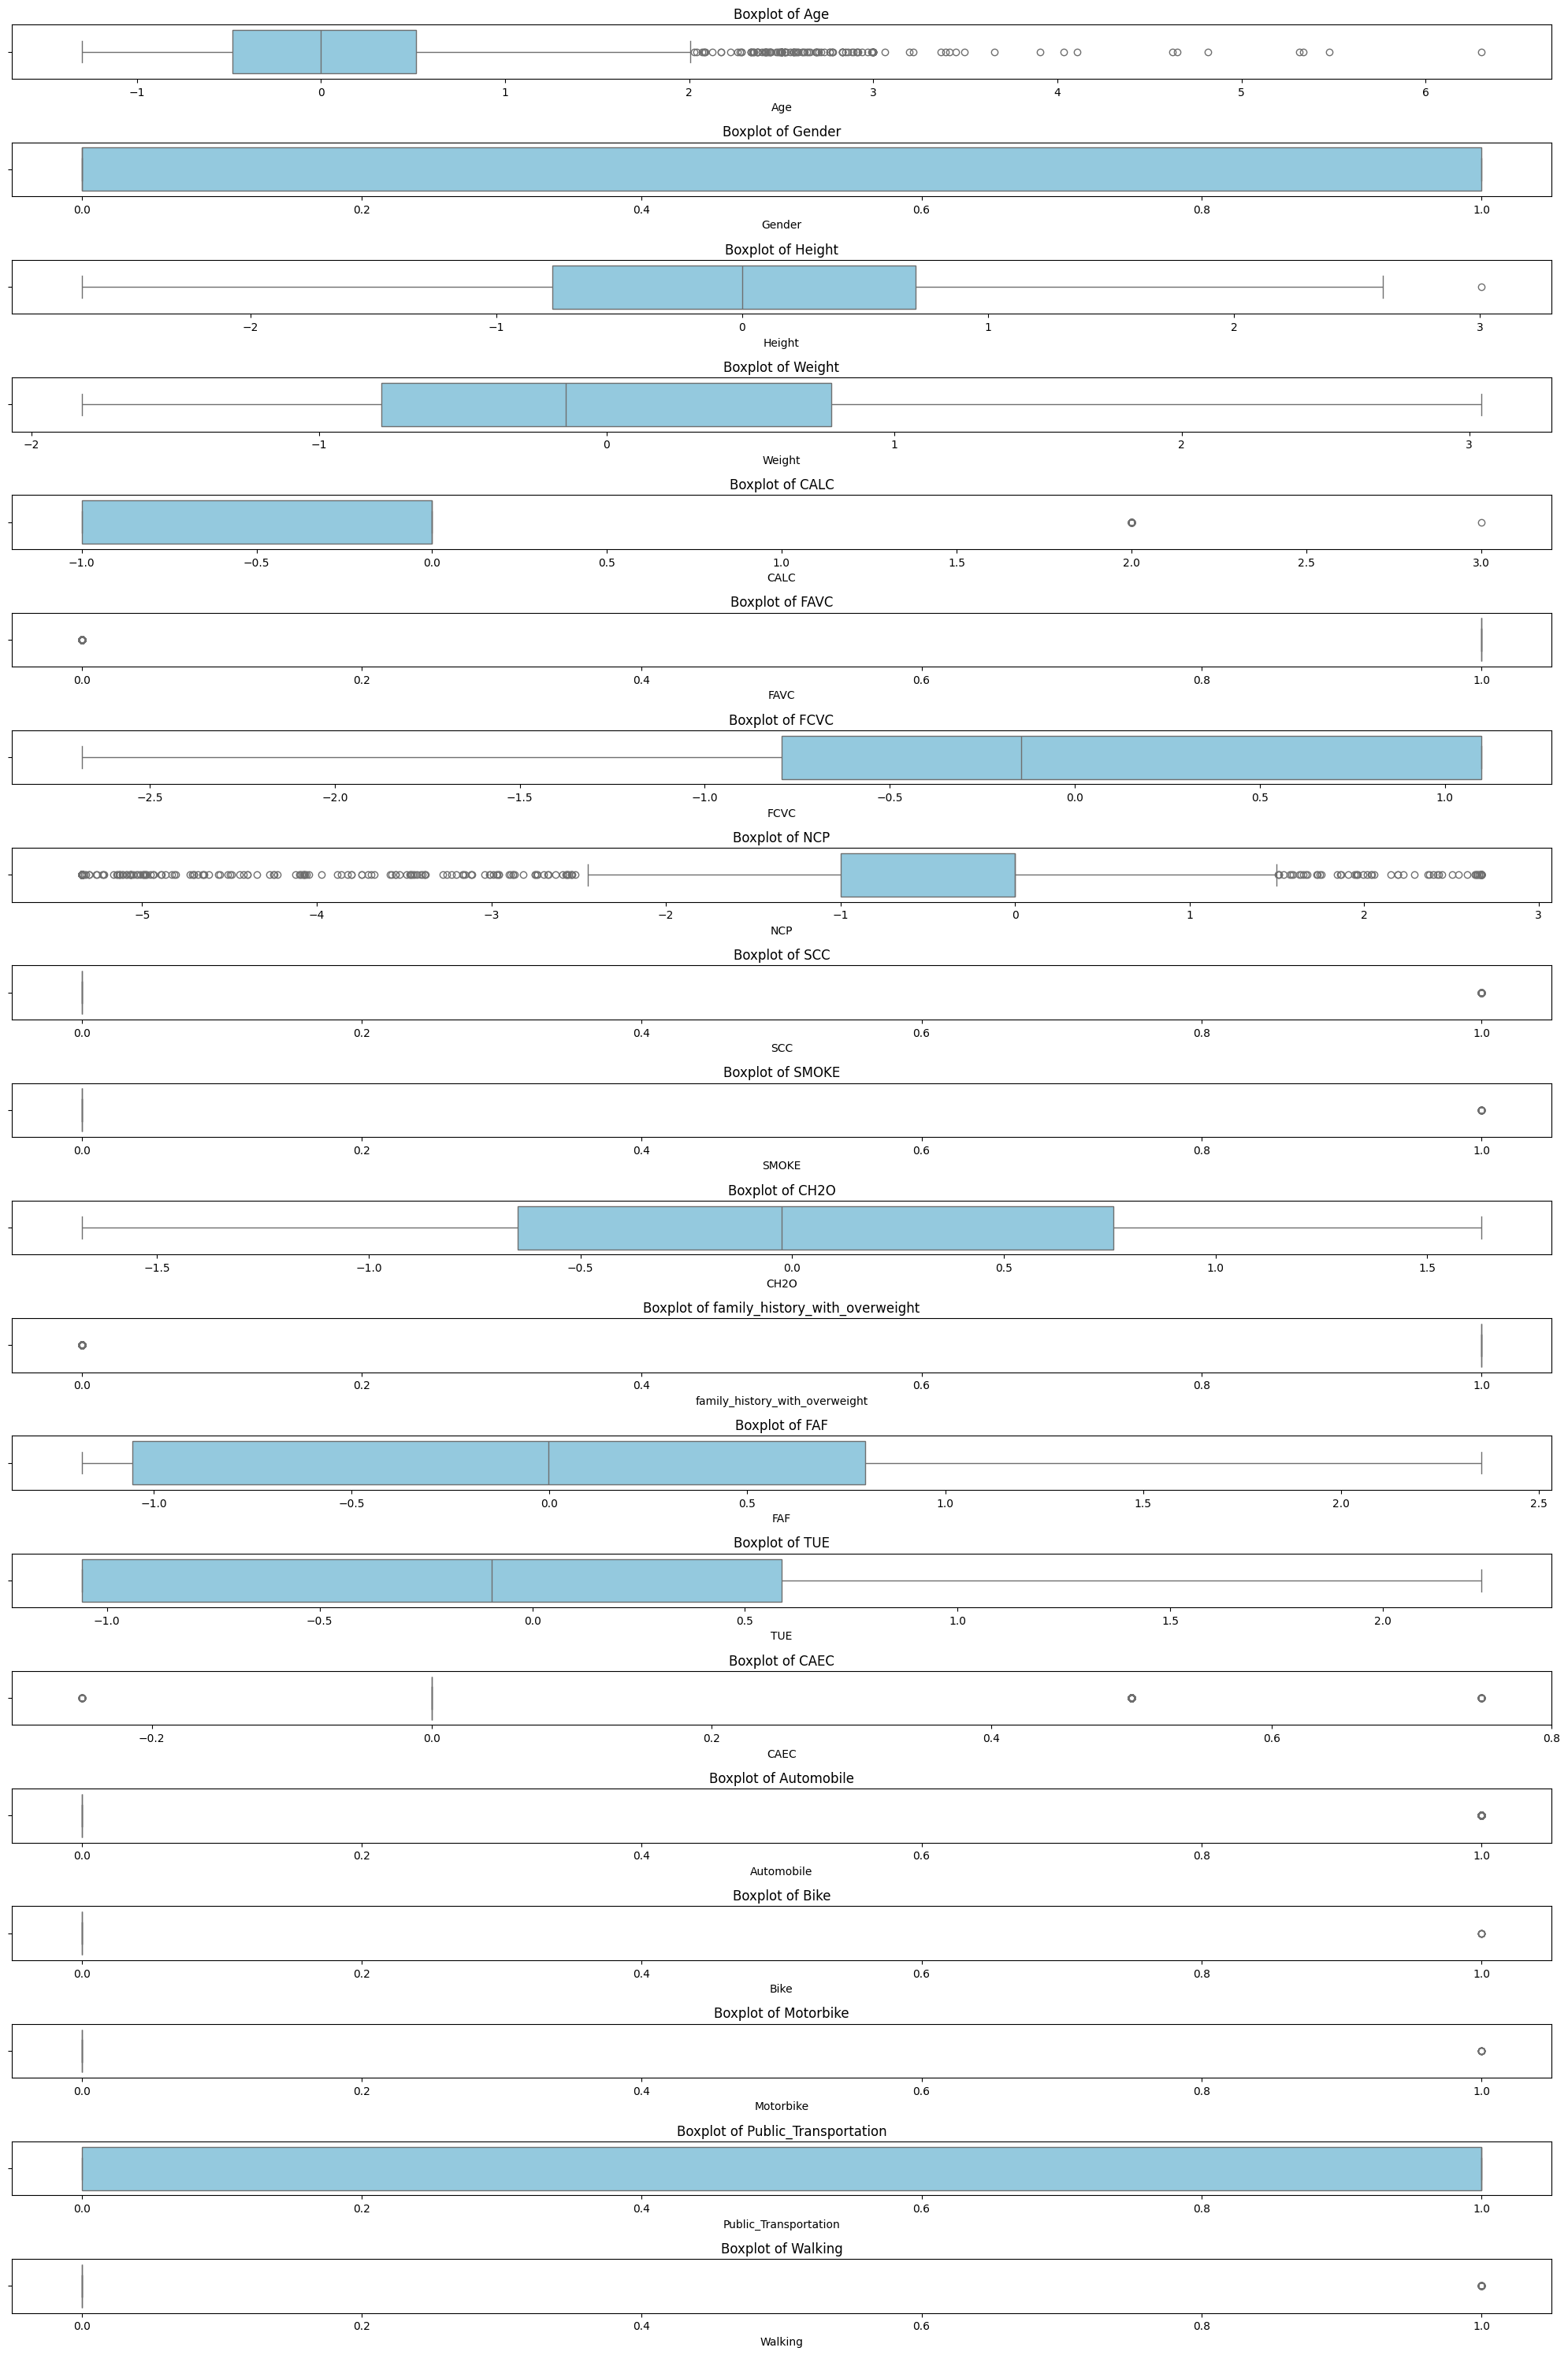

In [ ]:
numeric_cols = X_train_scaled.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (20, 30))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x = X_train_scaled[col], color = 'skyblue')
    plt.title(f'Boxplot of {col}', fontsize = 12)
    plt.tight_layout()

plt.show()
